# E-tivity 2: Data Preperation
## Collin Wyer (14103001)

### Task: 
 - encoded all categorical attributes as numerical,
 - filled in all missing values
 - applied a scaler to rescale features
 - treated outliers appropriately
 - created at least one new feature from the existing ones

## A. Import Python Modules and Dataset

In [567]:
# Import Python Modules
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.impute import MissingIndicator
import matplotlib.pyplot as plt
%matplotlib inline

# Read file

df= pd.read_csv("bank.csv")

In [568]:
# Select sample to view

df.tail(7).T

,1993,1994,1995,1996,1997,1998,1999
age,35,26,20,28,81,46,40
job,management,student,student,admin.,retired,services,entrepreneur
marital,married,single,single,single,married,married,married
education,NaN,secondary,NaN,secondary,primary,primary,secondary
default,no,no,no,no,no,no,no
balance,2326,655,2785,127,1154,4343,6403
housing,yes,no,no,no,no,yes,no
loan,yes,no,no,no,no,no,no
contact,cellular,cellular,cellular,cellular,telephone,NaN,cellular
day,16,16,16,16,17,20,22


In [569]:
# check dtypes
df.dtypes

age           float64
job            object
marital        object
education      object
default        object
balance         int64
housing        object
loan           object
contact        object
day             int64
month          object
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome       object
subscribed     object
dtype: object

In [570]:
# Determine the number of nulls/NaNs in the dataset
df.isna().sum()

age            12
job            10
marital         0
education     104
default         0
balance         0
housing         0
loan            0
contact       191
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      454
subscribed      0
dtype: int64

In [571]:
len(df)

2000

We can already see from the above there are missing values present and/or values that will require alteration

Also, we can see that there are columns that will need to be changed into numerical format and some that should be fine; 'age', 'balance', 'day', 'duration', 'campaign', 'pdays' and 'previous' should all be ok for now. 'default', 'housing' and 'loan' are binary and use yes/no which can be changed to 1/0. There are also categorical columns that contain string types; 'job', 'education', 'marital', 'contact', 'month' and 'poutcome'.

Attribute nulls are < 25% so all can be kept. The attributes that contain nulls are age (12), job (10), education (104), contact (191) and poutcome (454).

In [572]:
# Before transformation, make a copy
df_original= df

## Process & Encoding of Attributes

### Determine columns

#### Numerical Columns

In [573]:
# determine numerical attributes 
num_cols = list(df.select_dtypes(exclude=['object']))
num_cols

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

#### Categorical Columns

In [574]:
# determine categorical attributes
cat_cols = list(df.select_dtypes(include=['object']))
cat_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'subscribed']

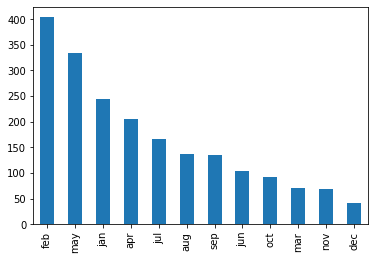

In [575]:
df['month'].value_counts().plot(kind= 'bar')

A visual representation of the distribution values can be helpful.

In [576]:
# month
# month is slightly different as it is ordinal
month_scale_mapper= {"jan":1, "feb":2, "mar":3, "apr":4, "may":5, 
               "jun":6, "jul":7, "aug":8, "sep":9, "oct":10, 
               "nov":11, "dec":12}
df['month']= df['month'].replace(month_scale_mapper)

In [579]:
df.tail(7).T

,1993,1994,1995,1996,1997,1998,1999
age,35,26,20,28,81,46,40
job,management,student,student,admin.,retired,services,entrepreneur
marital,married,single,single,single,married,married,married
education,NaN,secondary,NaN,secondary,primary,primary,secondary
default,no,no,no,no,no,no,no
balance,2326,655,2785,127,1154,4343,6403
housing,yes,no,no,no,no,yes,no
loan,yes,no,no,no,no,no,no
contact,cellular,cellular,cellular,cellular,telephone,NaN,cellular
day,16,16,16,16,17,20,22


We can see months now have a numerical value

In [580]:
# education
education_scale_mapper= {"primary":1, "secondary":2, "tertiary":3}
df['education']= df['education'].replace(education_scale_mapper)

df.tail(7).T

,1993,1994,1995,1996,1997,1998,1999
age,35,26,20,28,81,46,40
job,management,student,student,admin.,retired,services,entrepreneur
marital,married,single,single,single,married,married,married
education,NaN,2,NaN,2,1,1,2
default,no,no,no,no,no,no,no
balance,2326,655,2785,127,1154,4343,6403
housing,yes,no,no,no,no,yes,no
loan,yes,no,no,no,no,no,no
contact,cellular,cellular,cellular,cellular,telephone,NaN,cellular
day,16,16,16,16,17,20,22


In [543]:
# One-hot encode categoricals that contain NaNs
df= pd.get_dummies(df, columns=['job', 'contact', 'poutcome'], dummy_na=True, drop_first=True)

df.tail(7).T

,1993,1994,1995,1996,1997,1998,1999
age,35,26,20,28,81,46,40
marital,married,single,single,single,married,married,married
education,NaN,2,NaN,2,1,1,2
default,no,no,no,no,no,no,no
balance,2326,655,2785,127,1154,4343,6403
housing,yes,no,no,no,no,yes,no
loan,yes,no,no,no,no,no,no
day,16,16,16,16,17,20,22
month,9,9,9,9,9,9,9
duration,319,190,327,1334,231,185,208


In [544]:
# One-hot encode remainder of categorical
df= pd.get_dummies(df, drop_first=True)

df.tail(7).T

,1993,1994,1995,1996,1997,1998,1999
age,35.0,26.0,20.0,28.0,81.0,46.0,40.0
education,NaN,2.0,NaN,2.0,1.0,1.0,2.0
balance,2326.0,655.0,2785.0,127.0,1154.0,4343.0,6403.0
day,16.0,16.0,16.0,16.0,17.0,20.0,22.0
month,9.0,9.0,9.0,9.0,9.0,9.0,9.0
duration,319.0,190.0,327.0,1334.0,231.0,185.0,208.0
campaign,1.0,1.0,2.0,2.0,1.0,1.0,2.0
pdays,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
previous,0.0,0.0,0.0,0.0,0.0,0.0,0.0
job_blue-collar,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Treatment of Nulls & NaNs

#### age

In [545]:
# deal with age missing values using median
df['age'].fillna(df['age'].median(), inplace= True)

#### education

In [546]:
# education
### df.loc[(df['education']== 'NaN') & (df['job_management']== 1), 'education']= 'tertiary'

# couldn't get this approach to work?

In [547]:
# deal with age missing values using median
df['education'].fillna(df['education'].median(), inplace= True)

In [548]:
# df['poutcome'].fillna(df['poutcome'].median(), inplace=True)

In [549]:
# check there are no missing values/NaNs
df.isna().sum()

age                  0
education            0
balance              0
day                  0
month                0
duration             0
campaign             0
pdays                0
previous             0
job_blue-collar      0
job_entrepreneur     0
job_housemaid        0
job_management       0
job_retired          0
job_self-employed    0
job_services         0
job_student          0
job_technician       0
job_unemployed       0
job_nan              0
contact_telephone    0
contact_nan          0
poutcome_other       0
poutcome_success     0
poutcome_nan         0
marital_married      0
marital_single       0
default_yes          0
housing_yes          0
loan_yes             0
subscribed_yes       0
dtype: int64

#### pdays

The pdays column represents the number of days since a customer was last contacted from a previous campaign. The -1 value suggests there was no contact. This column also contains multiple information and can be separated as follows;
   a) was there contact.
   b) how long since last contact.
   
Transforming the -1 value to 0 indicates there was no contact, and a value of 1 indicates there was contact. 
This however presents its own problems with data skew, so maybe dropping it would be the solution?

In [550]:
# using the apply function the column can be manipulated as desired.
df['contacted'] = df['pdays'].apply(lambda row: 0 if row == -1 else 1)

# new column
df.drop('pdays', axis= 1, inplace=True)

# check the new column
df[['contacted']].tail(7)

,contacted
1993,0
1994,0
1995,0
1996,0
1997,0
1998,0
1999,0


In [551]:
df.tail(7).T

,1993,1994,1995,1996,1997,1998,1999
age,35.0,26.0,20.0,28.0,81.0,46.0,40.0
education,2.0,2.0,2.0,2.0,1.0,1.0,2.0
balance,2326.0,655.0,2785.0,127.0,1154.0,4343.0,6403.0
day,16.0,16.0,16.0,16.0,17.0,20.0,22.0
month,9.0,9.0,9.0,9.0,9.0,9.0,9.0
duration,319.0,190.0,327.0,1334.0,231.0,185.0,208.0
campaign,1.0,1.0,2.0,2.0,1.0,1.0,2.0
previous,0.0,0.0,0.0,0.0,0.0,0.0,0.0
job_blue-collar,0.0,0.0,0.0,0.0,0.0,0.0,0.0
job_entrepreneur,0.0,0.0,0.0,0.0,0.0,0.0,1.0


We can see that 'contacted' now contains 0's instead of -1

In [552]:
# check dtypes
df.dtypes

age                  float64
education            float64
balance                int64
day                    int64
month                  int64
duration               int64
campaign               int64
previous               int64
job_blue-collar        uint8
job_entrepreneur       uint8
job_housemaid          uint8
job_management         uint8
job_retired            uint8
job_self-employed      uint8
job_services           uint8
job_student            uint8
job_technician         uint8
job_unemployed         uint8
job_nan                uint8
contact_telephone      uint8
contact_nan            uint8
poutcome_other         uint8
poutcome_success       uint8
poutcome_nan           uint8
marital_married        uint8
marital_single         uint8
default_yes            uint8
housing_yes            uint8
loan_yes               uint8
subscribed_yes         uint8
contacted              int64
dtype: object

We can see that all data types are now numerical.

### Rescaling

In [553]:
# Apply RobustScaler to attributes with outliers
rs= RobustScaler()
df[[ 'default_yes', 'balance', 'previous', 'duration', 'campaign', 'age']] = rs.fit_transform(df[['default_yes', 'balance', 'previous', 'duration', 'campaign', 'age']])

In [554]:
# To bring attributes (without outliers) to interval [1,0] we divide max => 
# for month, there are 12 months so we divide by month by 12
df['education']= df['education']/3
df['day']= df['day']/31
df['month']= df['month']/12

### Outliers

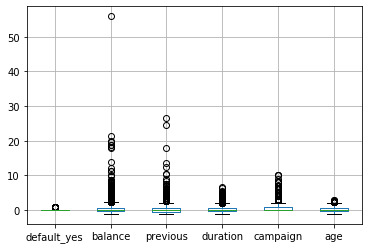

In [555]:
# boxplots are an efficent way to visualize the existance of outliers.
# we are aware of an outlier in balance so we will take a look at it...and some others
df.boxplot(column=['default_yes', 'balance', 'previous', 'duration', 'campaign', 'age'])
plt.show()

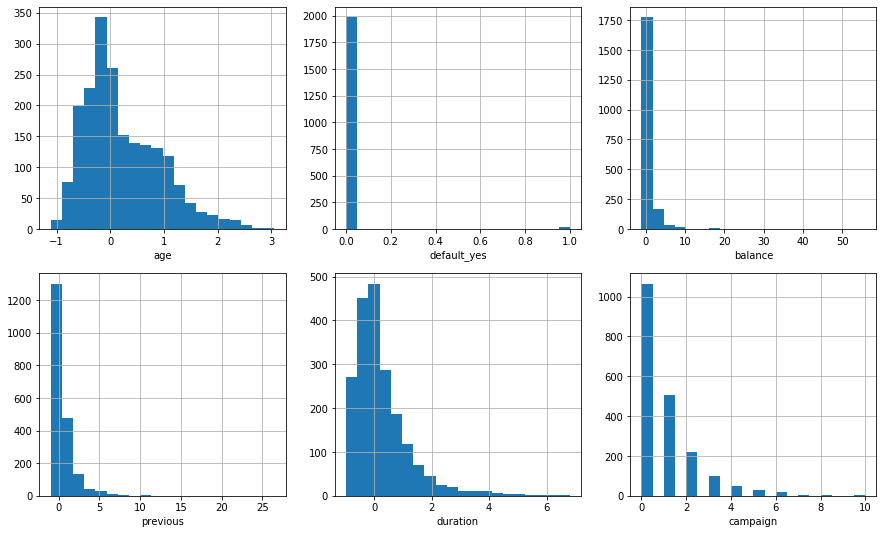

In [556]:
fig= plt.figure(figsize=(15,9))

# age
h_age = fig.add_subplot(2, 3, 1)
h_age.set_xlabel('age')
df['age'].hist(bins=20)


# default_yes
h_def = fig.add_subplot(2, 3, 2)
h_def.set_xlabel('default_yes')
df['default_yes'].hist(bins=20)

# balance
h_bal = fig.add_subplot(2, 3, 3)
h_bal.set_xlabel('balance')
df['balance'].hist(bins=20)

# previous
h_pre = fig.add_subplot(2, 3, 4)
h_pre.set_xlabel('previous')
df['previous'].hist(bins=20)

# duration
h_dur = fig.add_subplot(2, 3, 5)
h_dur.set_xlabel('duration')
df['duration'].hist(bins=20)


# campaign
h_camp = fig.add_subplot(2, 3, 6)
h_camp.set_xlabel('campaign')
df['campaign'].hist(bins=20)

plt.show()

As we can see all these are mostly left skewed.  
Before dealing with the outliers we will obtain the min values.

In [557]:
df[['default_yes', 'balance', 'previous', 'duration', 'campaign', 'age']].min()

default_yes    0.000000
balance       -1.060984
previous      -1.000000
duration      -0.982833
campaign       0.000000
age           -1.111111
dtype: float64

Outliers can be naturally occuring so it is quite possible that these extreme values are correct. Applying a log transformation is one method of diminishing the negative impact of an outlier.

Shifting the values to the interval [1,+∞]  before applying the log transformation

In [558]:
# using log transform to decrease outlier impact
df['default_yes'] = np.log(df['default_yes']+ 1)
df['balance'] = np.log(df['balance']+ 2.07)
df['previous'] = np.log(df['previous']+ 2)
df['duration'] = np.log(df['duration']+ 1.99)
df['campaign'] = np.log(df['campaign']+ 2)
df['age'] = np.log(df['age']+2.1)

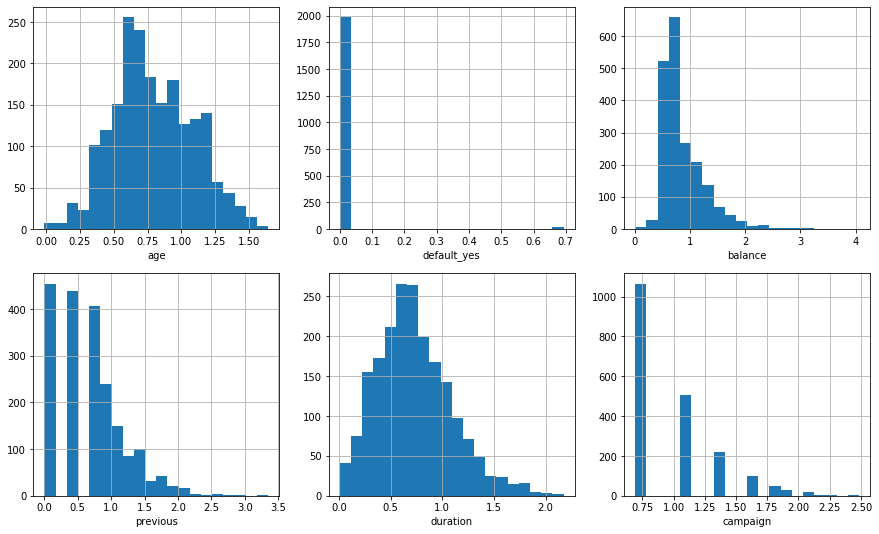

In [559]:
fig= plt.figure(figsize=(15,9))

# age
h_def = fig.add_subplot(2, 3, 1)
h_def.set_xlabel('age')
df['age'].hist(bins=20)

# default_yes
h_def = fig.add_subplot(2, 3, 2)
h_def.set_xlabel('default_yes')
df['default_yes'].hist(bins=20)

# balance
h_bal = fig.add_subplot(2, 3, 3)
h_bal.set_xlabel('balance')
df['balance'].hist(bins=20)

# previous
h_pre = fig.add_subplot(2, 3, 4)
h_pre.set_xlabel('previous')
df['previous'].hist(bins=20)

# duration
h_dur = fig.add_subplot(2, 3, 5)
h_dur.set_xlabel('duration')
df['duration'].hist(bins=20)


# campaign
h_camp = fig.add_subplot(2, 3, 6)
h_camp.set_xlabel('campaign')
df['campaign'].hist(bins=20)


plt.show()

We can observe from the newly transformed features that the distribution values are less skewed and show a slight improvement towards more normal values. 

In [560]:
df.tail(7).T

,1993,1994,1995,1996,1997,1998,1999
age,0.659246,0.360003,0.095310,0.434664,1.501605,0.933912,0.793495
education,0.666667,0.666667,0.666667,0.666667,0.333333,0.333333,0.666667
balance,1.193946,0.761774,1.285967,0.574458,0.911431,1.547107,1.812451
day,0.516129,0.516129,0.516129,0.516129,0.548387,0.645161,0.709677
month,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000
duration,0.852807,0.583653,0.867335,1.902473,0.677293,0.571610,0.625847
campaign,0.693147,0.693147,1.098612,1.098612,0.693147,0.693147,1.098612
previous,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
job_blue-collar,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
job_entrepreneur,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


# Create Feature

In [561]:
# Create a new feature 
df['nonsubscriber'] = (df['duration'] + df['previous'])
df[['nonsubscriber']] = rs.fit_transform(df[['nonsubscriber']])
df[['nonsubscriber']].min()


nonsubscriber   -1.488521
dtype: float64

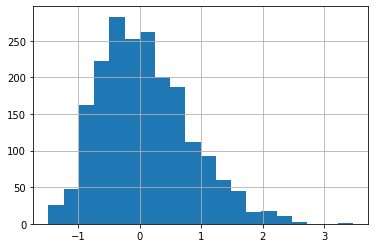

In [562]:
df['nonsubscriber'].hist(bins=20)
plt.show()

We can see the left skew before the log transformation is applied.

In [563]:
# apply the log transformation
df['nonsubscriber'] = np.log(df['nonsubscriber']+ 2.49)

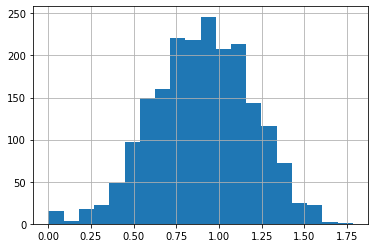

In [564]:
df['nonsubscriber'].hist(bins=20)
plt.show()

Now we can see an improved distribution

# Save

In [565]:
df.to_csv('bank_prepared.csv')